### Simple SVM model for INITIAL dataset


Loading and preprocessing data...
Performing cross-validation...
Fold 1
Accuracy: 0.1652
F1-Score: 0.1185

Fold 2
Accuracy: 0.1674
F1-Score: 0.1206

Fold 3
Accuracy: 0.1708
F1-Score: 0.1213

Fold 4
Accuracy: 0.1910
F1-Score: 0.1379

Fold 5
Accuracy: 0.1957
F1-Score: 0.1412


SVM Model Results:
Mean Accuracy: 0.1780 (+/- 0.0127)
F1-score: 0.1303
Precision: 0.1294
Recall: 0.1780
Training time: 20.77 seconds

Classification Report:
               precision    recall  f1-score   support

     Abundant       0.33      0.54      0.41        24
       Active       0.11      0.08      0.09        24
        Adult       0.00      0.00      0.00        10
        Agile       0.00      0.00      0.00        29
     Alluring       0.44      0.60      0.51        43
      Amiable       0.00      0.00      0.00        19
      Amusing       0.18      0.12      0.15        24
      Aqueous       0.00      0.00      0.00        14
 Aristocratic       0.00      0.00      0.00        14
     Aromatic   

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde

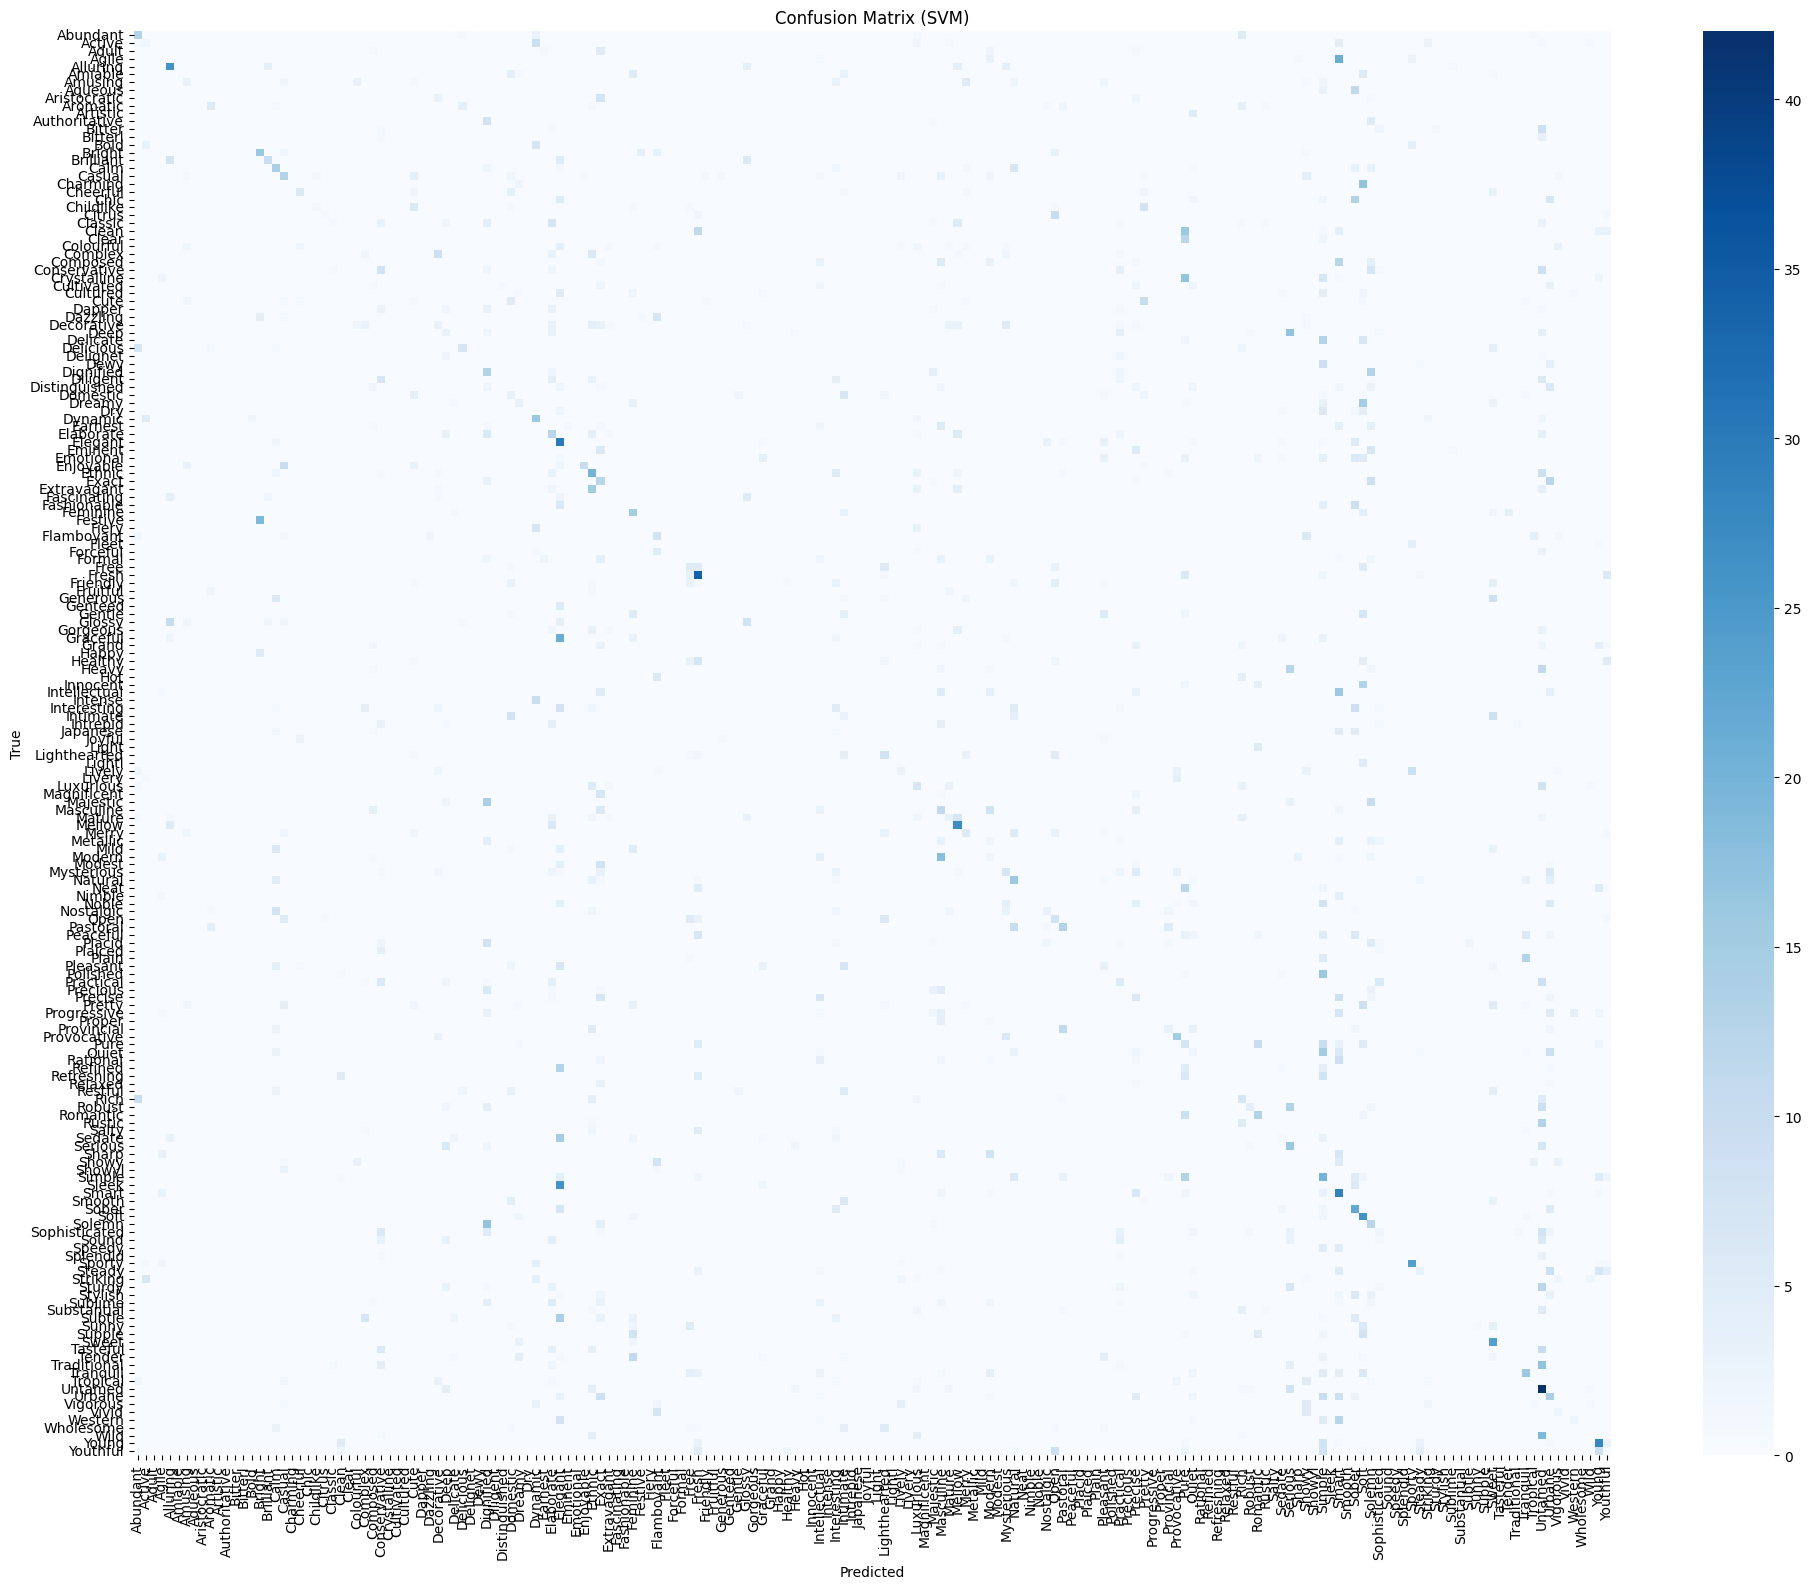

Training final model on entire training set...

Test Set Evaluation:
Test Accuracy: 0.2004
Test F1-score: 0.1446
Test Precision: 0.1402
Test Recall: 0.2004
Plotting learning curve...


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


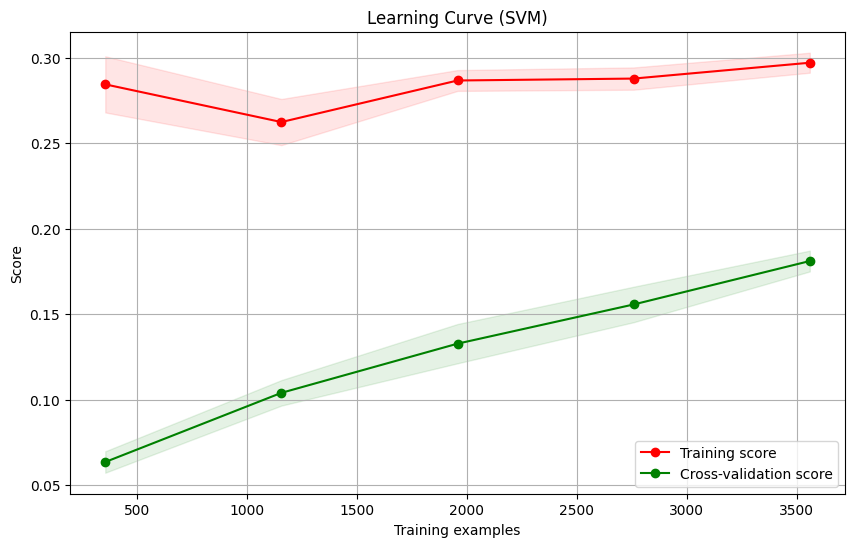

Plotting ROC curve...


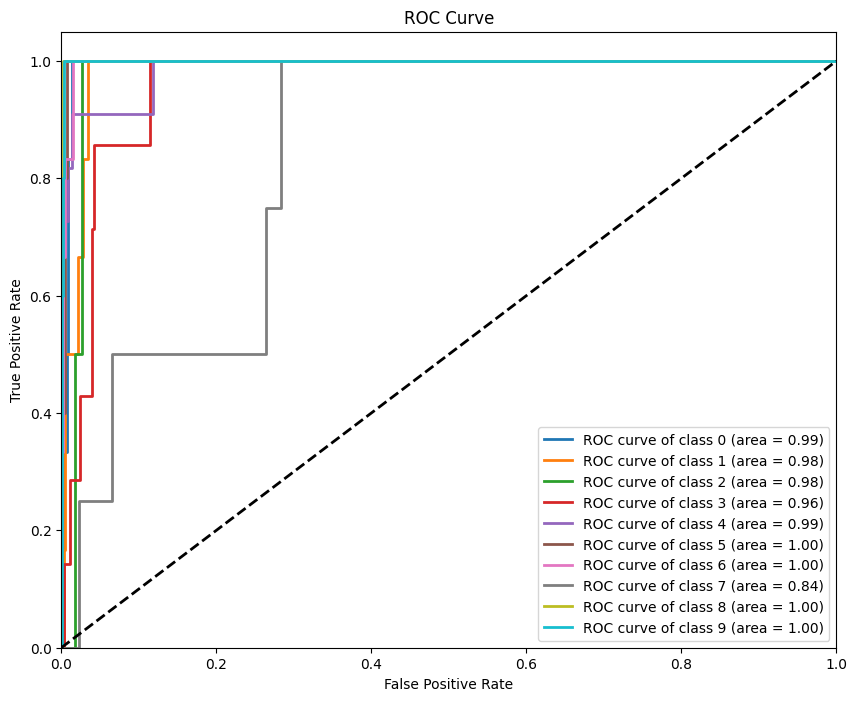


Model Complexity:
Number of support vectors: 4448

Model Fit Analysis:
Training Accuracy: 0.3032
Test Accuracy: 0.2004
Model may be overfitting: Training accuracy is significantly higher than test accuracy.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Load and preprocess the data
print("Loading and preprocessing data...")
data = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned.csv')
X = data.iloc[:, 1:].values / 255.0  # Features (RGB values), normalized
y = data.iloc[:, 0].values # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Perform cross-validation
print("Performing cross-validation...")
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
accuracies = []
all_y_true = []
all_y_pred = []

start_time = time.time()

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svm_model.fit(X_train_fold, y_train_fold)
    y_pred = svm_model.predict(X_val_fold)
    
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)
    
    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred)
    
    print(f"Fold {fold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1_score(y_val_fold, y_pred, average='weighted'):.4f}")
    print()

end_time = time.time()

# Print overall results
print("\nSVM Model Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")

# Calculate and print F1-score, precision, and recall
f1 = f1_score(all_y_true, all_y_pred, average='weighted')
precision = precision_score(all_y_true, all_y_pred, average='weighted')
recall = recall_score(all_y_true, all_y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"Training time: {end_time - start_time:.2f} seconds")

# Generate classification report
class_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=class_names))

# Generate confusion matrix
plt.figure(figsize=(20, 16))
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Train the final model on the entire training set
print("Training final model on entire training set...")
svm_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test_scaled)

print("\nTest Set Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test F1-score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")

# Plot learning curve
print("Plotting learning curve...")
plot_learning_curve(svm_model, "Learning Curve (SVM)", X_train_scaled, y_train, cv=5)
plt.show()

# Plot ROC curve
print("Plotting ROC curve...")
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(min(n_classes, 10)):  # Plot only first 10 classes to avoid clutter
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model complexity
n_support_vectors = svm_model.n_support_.sum()
print(f"\nModel Complexity:")
print(f"Number of support vectors: {n_support_vectors}")

# Check for overfitting/underfitting
train_score = svm_model.score(X_train_scaled, y_train)
test_score = svm_model.score(X_test_scaled, y_test)
print("\nModel Fit Analysis:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

if train_score > test_score + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than test accuracy.")
elif train_score < test_score - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than test accuracy.")
else:
    print("Model fit seems reasonable: Training and test accuracies are close.")

### Simple SVM model

characteristics : Uses a (RBF) kernel , Performs 5-fold cross-validation , Uses StandardScaler for feature scaling , Doesn't perform hyperparameter tuning


Loading and preprocessing data...
Performing cross-validation...
Fold 1
Accuracy: 0.5892
F1-Score: 0.5729

Fold 2
Accuracy: 0.5663
F1-Score: 0.5480

Fold 3
Accuracy: 0.5903
F1-Score: 0.5700

Fold 4
Accuracy: 0.5792
F1-Score: 0.5604

Fold 5
Accuracy: 0.5690
F1-Score: 0.5544


SVM Model Results:
Mean Accuracy: 0.5788 (+/- 0.0099)
F1-score: 0.5627
Precision: 0.5890
Recall: 0.5788
Training time: 64.40 seconds

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.62      0.86      0.72        84
         Active       0.53      0.60      0.56        83
          Adult       0.60      0.87      0.71        86
          Agile       0.69      0.74      0.72        86
       Alluring       0.72      0.65      0.68        86
        Amiable       0.32      0.63      0.43        87
        Amusing       0.77      0.87      0.82        83
   Aristocratic       0.87      0.92      0.89        86
       Aromatic       0.79      0.81      0.80       

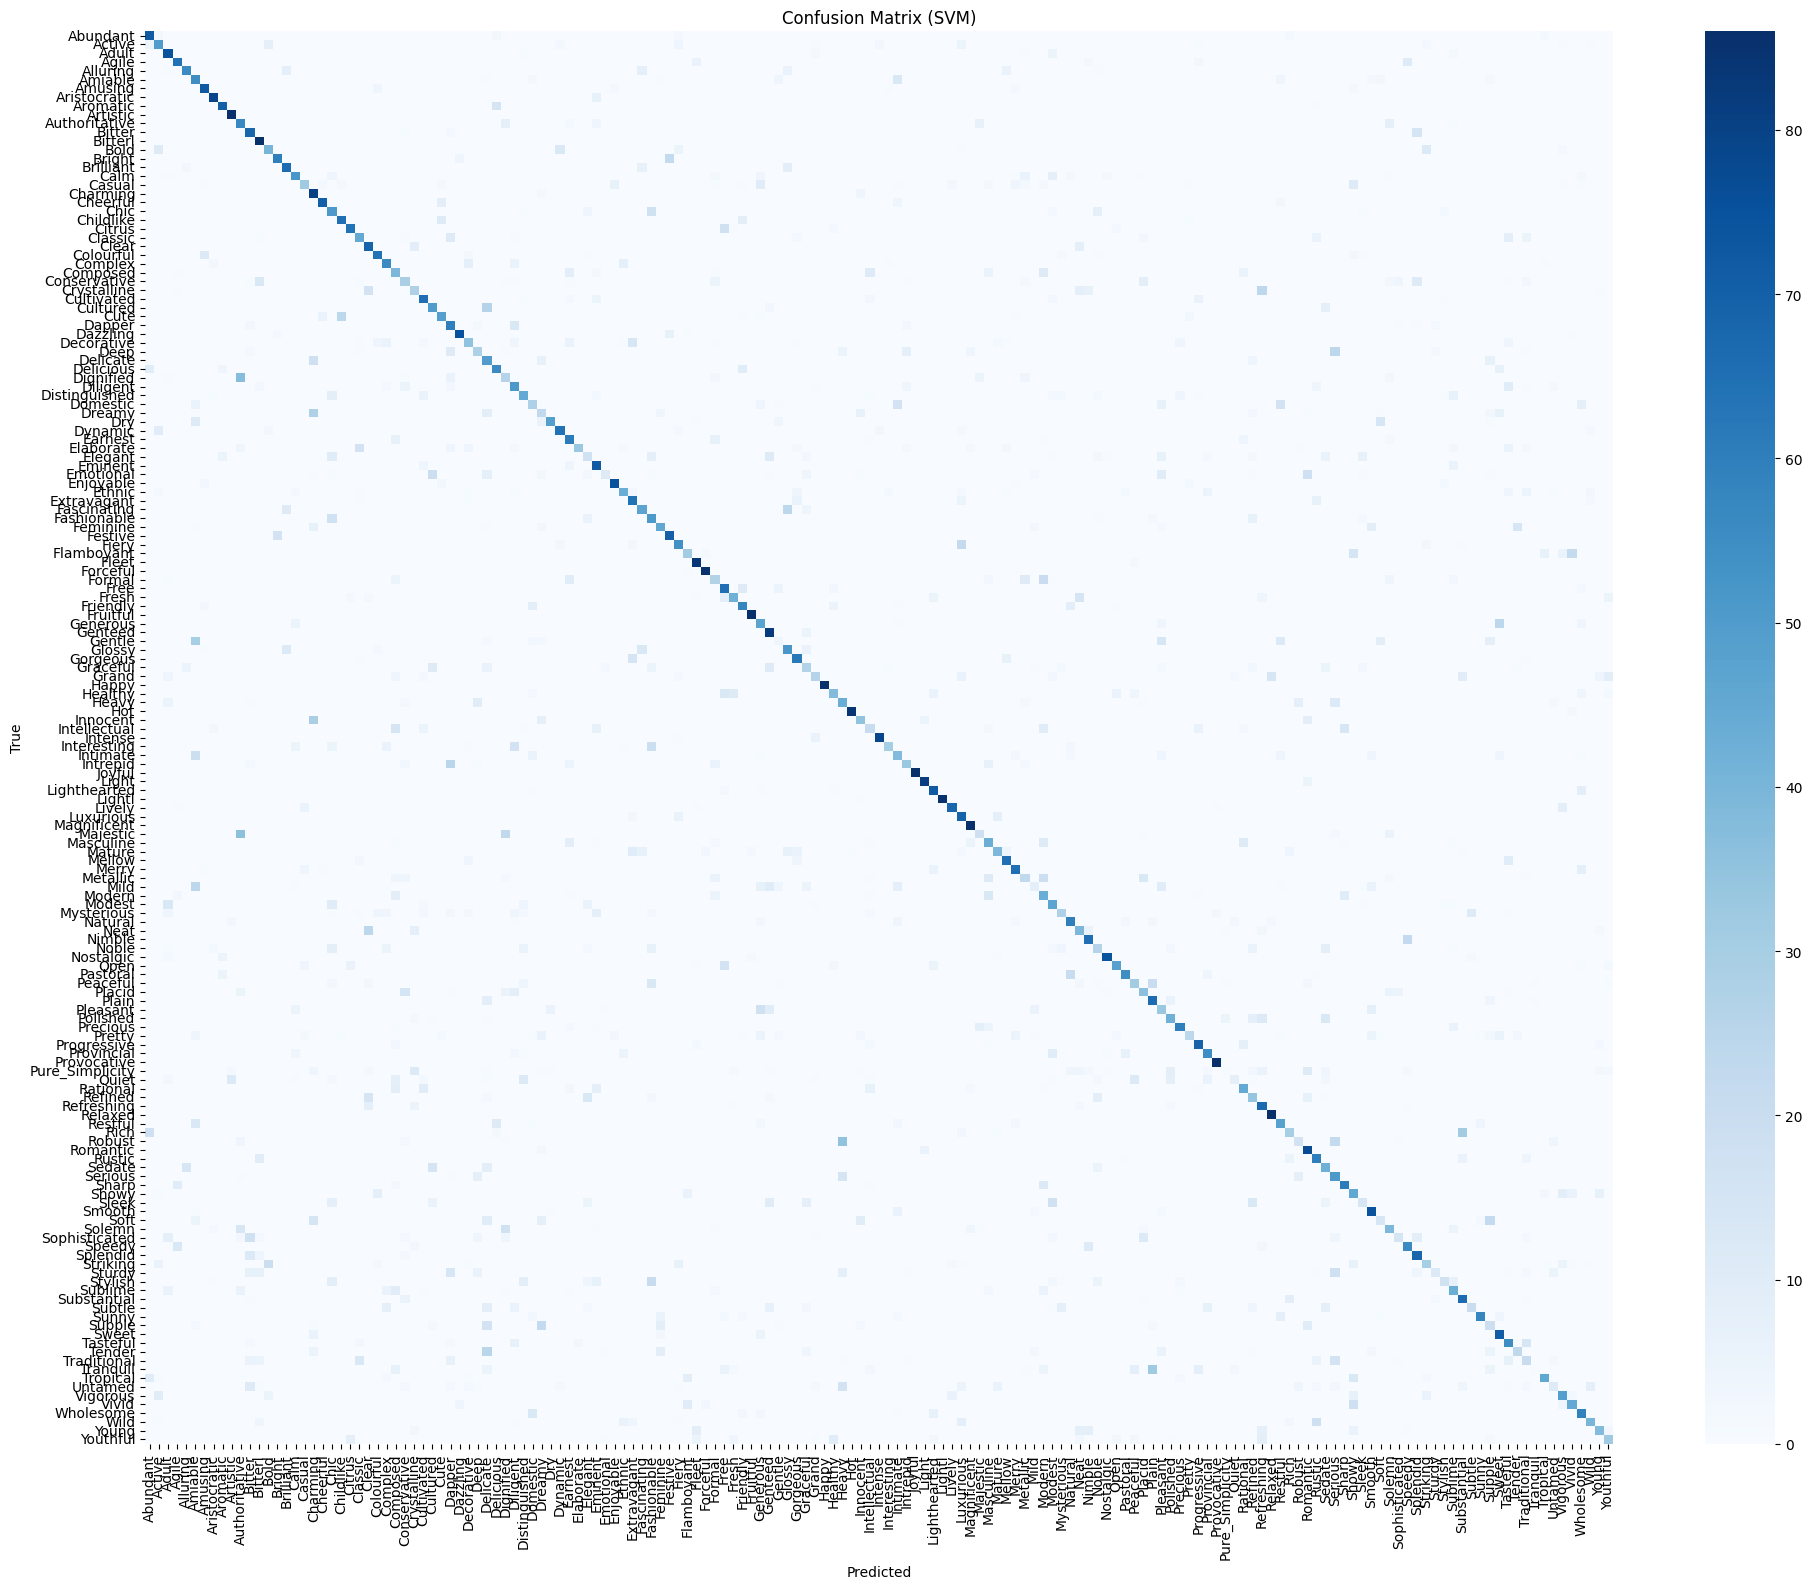

Training final model on entire training set...

Test Set Evaluation:
Test Accuracy: 0.6132
Test F1-score: 0.5967
Test Precision: 0.6259
Test Recall: 0.6132
Plotting learning curve...


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


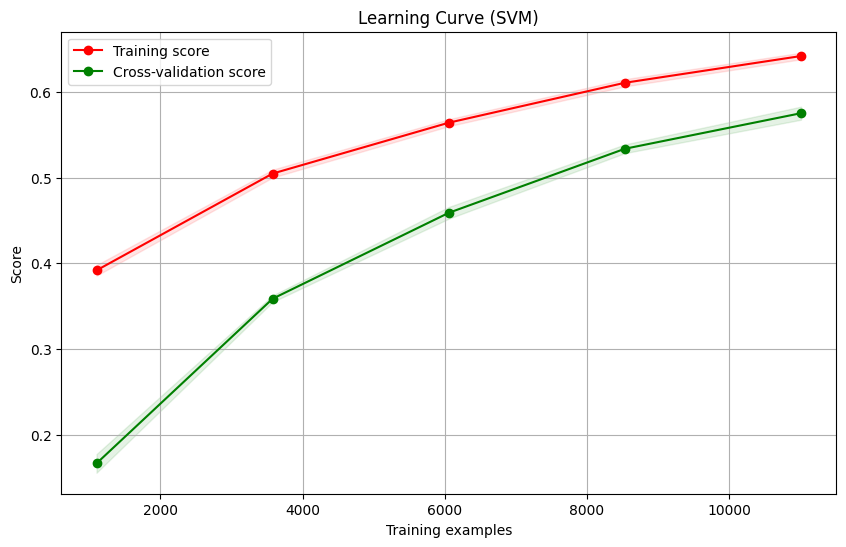

Plotting ROC curve...


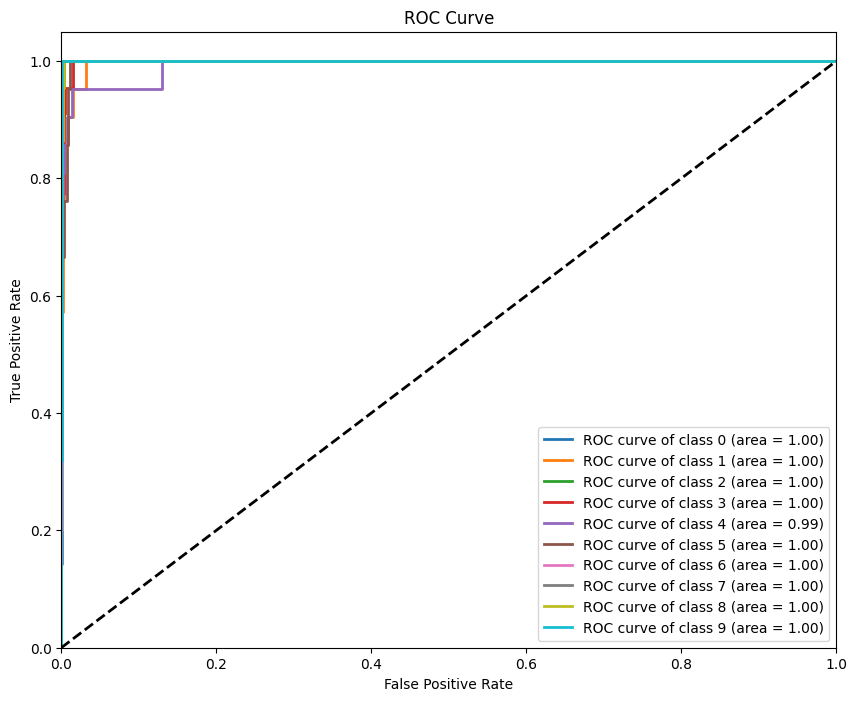


Model Complexity:
Number of support vectors: 13414

Model Fit Analysis:
Training Accuracy: 0.6677
Test Accuracy: 0.6132
Model may be overfitting: Training accuracy is significantly higher than test accuracy.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Load and preprocess the data
print("Loading and preprocessing data...")
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize feature values
y = data.iloc[:, -1].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Perform cross-validation
print("Performing cross-validation...")
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
accuracies = []
all_y_true = []
all_y_pred = []

start_time = time.time()

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svm_model.fit(X_train_fold, y_train_fold)
    y_pred = svm_model.predict(X_val_fold)
    
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)
    
    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred)
    
    print(f"Fold {fold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1_score(y_val_fold, y_pred, average='weighted'):.4f}")
    print()

end_time = time.time()

# Print overall results
print("\nSVM Model Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")

# Calculate and print F1-score, precision, and recall
f1 = f1_score(all_y_true, all_y_pred, average='weighted')
precision = precision_score(all_y_true, all_y_pred, average='weighted')
recall = recall_score(all_y_true, all_y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"Training time: {end_time - start_time:.2f} seconds")

# Generate classification report
class_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=class_names))

# Generate confusion matrix
plt.figure(figsize=(20, 16))
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Train the final model on the entire training set
print("Training final model on entire training set...")
svm_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test_scaled)

print("\nTest Set Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test F1-score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")

# Plot learning curve
print("Plotting learning curve...")
plot_learning_curve(svm_model, "Learning Curve (SVM)", X_train_scaled, y_train, cv=5)
plt.show()

# Plot ROC curve
print("Plotting ROC curve...")
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(min(n_classes, 10)):  # Plot only first 10 classes to avoid clutter
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model complexity
n_support_vectors = svm_model.n_support_.sum()
print(f"\nModel Complexity:")
print(f"Number of support vectors: {n_support_vectors}")

# Check for overfitting/underfitting
train_score = svm_model.score(X_train_scaled, y_train)
test_score = svm_model.score(X_test_scaled, y_test)
print("\nModel Fit Analysis:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

if train_score > test_score + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than test accuracy.")
elif train_score < test_score - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than test accuracy.")
else:
    print("Model fit seems reasonable: Training and test accuracies are close.")

### Analysis of Simple SVM model

1. Model Architecture: Support Vector Machine with RBF (Radial Basis Function) kernel
2. Performance Metrics:

- Mean Cross-validation Accuracy: 0.5788 (57.88%)
- Test Accuracy: 0.6132 (61.32%)
- Test F1-score: 0.5967 (59.67%)
- Test Precision: 0.6259 (62.59%)
- Test Recall: 0.6132 (61.32%)
- Training Accuracy: 0.6677 (66.77%)

3. Training Process: Used 5-fold cross-validation . Total training time: 71.80 seconds
4. Generalization:

- The model shows signs of overfitting: Training accuracy (66.77%) is significantly higher than test accuracy (61.32%) . The learning curve shows a gap between training and cross-validation scores, which doesn't narrow significantly as the number of training examples increases

5. Model Complexity:

- Number of support vectors: 13,414
- This is a high number of support vectors, indicating a complex decision boundary

6. Bias-Variance Trade-off:

- Moderate bias: Training accuracy of 66.77% suggests the model hasn't fully captured all patterns
- High variance: Gap between training (66.77%) and test (61.32%) accuracies indicates overfitting
- Bias estimate: 1 - Training Accuracy = 1 - 0.6677 = 0.3323 (33.23%)
- The model has relatively high bias (about 33.23%), meaning it's underfitting the training data . It also shows signs of overfitting to the training set, not generalizing well to new data

7. Class Performance: Performance varies widely across classes

- Best performing classes: Happy, Joyful, Lightl: 100% precision and recall . Hot, Fruitful, Provocative: > 95% precision and recall
- Worst performing classes: Pure_Simplicity, Tranquil: 2% F1-score . Gentle: 7% F1-score . Mild, Quiet: 14-16% F1-score

8. ROC Curve Analysis: The ROC curves for the displayed classes show excellent performance, with AUC (Area Under Curve) values of 1.00 or very close to 1.00. This suggests that the model has a high ability to distinguish between classes, at least for the subset of classes shown


### Final Version


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess the data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize pixel values to [0, 1]
y = data.iloc[:, -1].values

# 2. Encode the target variable
# LabelEncoder transforms text labels into numeric form
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Split the data into training and testing sets
# Stratify ensures that the class distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 4. Create a pipeline for preprocessing and model training
# Pipeline ensures that the same preprocessing steps are applied to both training and test data
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=0.95)),  # Reduce dimensionality while preserving 95% of variance
    ('svm', SVC(random_state=42, probability=True))  # SVM classifier with probability estimates
])

# 5. Define hyperparameters for grid search
# This comprehensive grid allows for thorough exploration of the hyperparameter space
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
    'svm__kernel': ['rbf', 'poly'],  # Kernel type
    'svm__degree': [2, 3, 4],  # Polynomial degree (only for 'poly' kernel)
    'svm__class_weight': [None, 'balanced'],  # Class weight
    'svm__coef0': [0.0, 0.1, 0.5, 1.0],  # Independent term in kernel function (important for 'poly' kernel)
}

# 6. Perform grid search with cross-validation
# GridSearchCV performs exhaustive search over specified parameter values
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    refit='f1_macro'  # Optimize for F1-score
)

# 7. Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# 8. Get the best model and its parameters
best_model = grid_search.best_estimator_
n_features_retained = best_model.named_steps['pca'].n_components_

# 9. Print cross-validation results
cv_results = grid_search.cv_results_
print(f"Cross-validation scores:")
print(f"Accuracy: {cv_results['mean_test_accuracy'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_accuracy'][grid_search.best_index_]:.4f})")
print(f"Precision: {cv_results['mean_test_precision_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_precision_macro'][grid_search.best_index_]:.4f})")
print(f"Recall: {cv_results['mean_test_recall_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_recall_macro'][grid_search.best_index_]:.4f})")
print(f"F1-score: {cv_results['mean_test_f1_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_f1_macro'][grid_search.best_index_]:.4f})")

# 10. Train the best model on the entire training set
best_model.fit(X_train, y_train)

# 11. Make predictions on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 12. Calculate and print metrics
def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1': f1_score(y_true, y_pred, average='macro')
    }

train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

print("\nImproved SVM Model Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Number of features retained after PCA: {n_features_retained}")
print("\nMetrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    print(f"{metric.capitalize()}:")
    print(f"  Train: {train_metrics[metric]:.4f}")
    print(f"  Test:  {test_metrics[metric]:.4f}")
    print(f"  Difference: {train_metrics[metric] - test_metrics[metric]:.4f}")

# 13. Print detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# 14. Generate and save confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()

# 15. Generate and save learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y_encoded, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('learning_curves.png')
plt.close()

# 16. Analyze and visualize class distribution
class_distribution = pd.Series(y).value_counts().sort_index()
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.close()

# 17. Function to predict emotion for new RGB values
def predict_emotion(rgb_values):
    rgb_array = np.array(rgb_values).reshape(1, -1) / 255.0
    prediction_encoded = best_model.predict(rgb_array)
    prediction_proba = best_model.predict_proba(rgb_array)
    prediction = label_encoder.inverse_transform(prediction_encoded)
    return prediction[0], prediction_proba[0]

# Example usage of the prediction function
new_rgb = [229, 0, 13, 225, 225, 255, 253, 166, 74]
predicted_emotion, prediction_proba = predict_emotion(new_rgb)
print(f"\nPredicted Emotion: {predicted_emotion}")
print("Prediction Probabilities:")
for emotion, prob in zip(label_encoder.classes_, prediction_proba):
    print(f"{emotion}: {prob:.4f}")

# 18. Analyze misclassified samples
misclassified = X_test[y_test != y_test_pred]
misclassified_true = y_test[y_test != y_test_pred]
misclassified_pred = y_test_pred[y_test != y_test_pred]

print("\nMisclassified Samples Analysis:")
for i in range(min(10, len(misclassified))):  # Print first 10 misclassifications
    true_label = label_encoder.inverse_transform([misclassified_true[i]])[0]
    pred_label = label_encoder.inverse_transform([misclassified_pred[i]])[0]
    print(f"Sample {i+1}:")
    print(f"  True label: {true_label}")
    print(f"  Predicted label: {pred_label}")
    print(f"  RGB values: {misclassified[i]}")
    print()

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


KeyboardInterrupt: 

### Same code but without PCA and have more metrics like the MLP


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and preprocess the data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Create a pipeline (without PCA)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, probability=True))
])

# Define hyperparameters for grid search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'poly'],
    'svm__degree': [2, 3, 4],
    'svm__class_weight': [None, 'balanced'],
    'svm__coef0': [0.0, 0.1, 0.5, 1.0],
}

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    refit='f1_macro'
)

# Fit the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get the best model
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_results = grid_search.cv_results_
print(f"Cross-validation scores:")
print(f"Accuracy: {cv_results['mean_test_accuracy'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_accuracy'][grid_search.best_index_]:.4f})")
print(f"Precision: {cv_results['mean_test_precision_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_precision_macro'][grid_search.best_index_]:.4f})")
print(f"Recall: {cv_results['mean_test_recall_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_recall_macro'][grid_search.best_index_]:.4f})")
print(f"F1-score: {cv_results['mean_test_f1_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_f1_macro'][grid_search.best_index_]:.4f})")

# Make predictions on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics for train and test sets
def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1': f1_score(y_true, y_pred, average='macro')
    }

train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# Print results
print("\nImproved SVM Model Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"\nTraining time: {end_time - start_time:.2f} seconds")
print("\nMetrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    print(f"{metric.capitalize()}:")
    print(f"  Train: {train_metrics[metric]:.4f}")
    print(f"  Test:  {test_metrics[metric]:.4f}")
    print(f"  Difference: {train_metrics[metric] - test_metrics[metric]:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=False, cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_svm.png')
plt.close()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y_encoded, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Learning Curves (SVM)")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('learning_curves_svm.png')
plt.close()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(min(n_classes, 10)):  # Plot only first 10 classes to avoid clutter
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_svm.png')
plt.close()

# Model complexity
n_support_vectors = best_model.named_steps['svm'].n_support_.sum()
print(f"\nModel Complexity:")
print(f"Number of support vectors: {n_support_vectors}")

# Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Training Accuracy: {train_metrics['accuracy']:.4f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")

if train_metrics['accuracy'] > test_metrics['accuracy'] + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than test accuracy.")
elif train_metrics['accuracy'] < test_metrics['accuracy'] - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than test accuracy.")
else:
    print("Model fit seems reasonable: Training and test accuracies are close.")

# Function to predict emotion for new RGB values
def predict_emotion(rgb_values):
    rgb_array = np.array(rgb_values).reshape(1, -1) / 255.0
    prediction_encoded = best_model.predict(rgb_array)
    prediction_proba = best_model.predict_proba(rgb_array)
    prediction = label_encoder.inverse_transform(prediction_encoded)
    return prediction[0], prediction_proba[0]

# Example usage
new_rgb = [229, 0, 13, 225, 225, 255, 253, 166, 74]
predicted_emotion, prediction_proba = predict_emotion(new_rgb)
print(f"\nPredicted Emotion: {predicted_emotion}")
print("Prediction Probabilities:")
for emotion, prob in zip(label_encoder.classes_, prediction_proba):
    print(f"{emotion}: {prob:.4f}")

# Error analysis
misclassified = X_test[y_test != y_test_pred]
misclassified_true = y_test[y_test != y_test_pred]
misclassified_pred = y_test_pred[y_test != y_test_pred]

print("\nMisclassified Samples Analysis:")
for i in range(min(10, len(misclassified))):  # Print first 10 misclassifications
    true_label = label_encoder.inverse_transform([misclassified_true[i]])[0]
    pred_label = label_encoder.inverse_transform([misclassified_pred[i]])[0]
    print(f"Sample {i+1}:")
    print(f"  True label: {true_label}")
    print(f"  Predicted label: {pred_label}")
    print(f"  RGB values: {misclassified[i]}")
    print()

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


KeyboardInterrupt: 

### Important Conclusion : Poly kernel is BETTER from RBF kernel

- Model Selection Process:
  In machine learning, we often start with simpler models (like RBF SVM) and progressively explore more complex ones. The shift from RBF to polynomial kernel is part of this exploratory process.
- Hyperparameter Tuning:
  By including both RBF and polynomial kernels in the grid search, we allow the algorithm to determine which kernel performs better for our specific dataset. The fact that a polynomial kernel was selected suggests it captures the underlying patterns in the data more effectively.
- The polynomial kernel implies that the relationship between features (RGB values) and labels (emotions) in this dataset might be better represented by polynomial functions rather than the infinite-dimensional feature space of RBF.
- Polynomial kernels can capture more complex decision boundaries than linear kernels, while still being less prone to overfitting compared to RBF kernels in some cases.
- Interpretability:
  Polynomial kernels, especially of lower degrees, can sometimes be more interpretable than RBF kernels. This can be valuable in understanding how different color combinations relate to emotions.
- Performance Metrics:
  The improved accuracy and F1-score with the polynomial kernel empirically demonstrate its superiority for this specific task.
- Generalization:
  The similar gap between train and test performance suggests that the polynomial kernel is generalizing well, addressing a common concern that more complex models might overfit.
- Computational Efficiency:
  In some cases, polynomial kernels can be more computationally efficient than RBF kernels, especially for lower degrees.
